In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

from warnings import filterwarnings
filterwarnings("ignore")

# Outcome=1 Diabetics
# Outcome=0 Healthy

In [84]:
data=pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


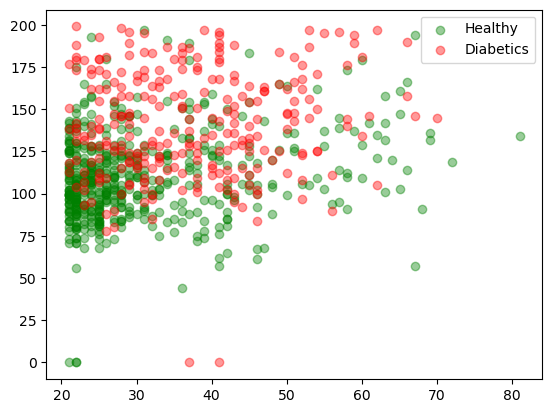

In [85]:
Diabetics=data[data.Outcome==1]
Healthy=data[data.Outcome==0]


# let's visualize with only Glucose for now
# At the end the code will make the prediction based on other data , not only with Glucose 

plt.scatter(Healthy.Age, Healthy.Glucose, color="Green", label="Healthy", alpha=0.4)
plt.scatter(Diabetics.Age, Diabetics.Glucose, color="Red", label="Diabetics", alpha=0.4)
plt.xlabel=("Age")
plt.ylabel=("Glucose")
plt.legend()
plt.show()

In [86]:
# let's determine x & y axis
y=data.Outcome.values
x_raw_data=data.drop(["Outcome"],axis=1)
# and depent variable's removed(Outcome column) , only independent variables will be left  
# KNN algorithms will be grouped within only x values


# raw data values have to be within 0 and 1  for accurate outcomes
# so let's make normalization for it 
x=(x_raw_data-np.min(x_raw_data))/(np.max(x_raw_data)-np.min(x_raw_data))
print("\n\nAfter normalization:\n\n")
print(x.head())

print("\n"*5)

print("\n\nBefore Normalization\n\n")
print(x_raw_data.head())



After normalization:


   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2     0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3     0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4     0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   

   DiabetesPedigreeFunction       Age  
0                  0.234415  0.483333  
1                  0.116567  0.166667  
2                  0.253629  0.183333  
3                  0.038002  0.000000  
4                  0.943638  0.200000  








Before Normalization


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8     

In [87]:
# let's split train and test data from each other
# train data to distinguish between healthy and diabetic people 
# let's see if our machine learning model can accurately distinguish between diabetics and healthy people if test data 

x_train,x_test, y_train, y_test =train_test_split(x,y, test_size=0.1, random_state=1)
# let's create KNN Model
knn=KNeighborsClassifier(n_neighbors=3)
# n_neighbors=k values k
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)
print("test data for k values k=3 ")
knn.score(x_test, y_test)*100

test data for k values k=3 


83.11688311688312

In [88]:
print('%', knn.score(x_test, y_test)*100)

% 83.11688311688312


In [89]:
count= 1

for k in range(1,11):
    knn_new=KNeighborsClassifier(n_neighbors=k)
    knn_new.fit(x_train, y_train)
    prediction=knn_new.predict(x_test)
    print("knn","=", count, "prediction for value  %", knn_new.score(x_test,y_test)*100)
    count+=1
    
        

knn = 1 prediction for value  % 71.42857142857143
knn = 2 prediction for value  % 71.42857142857143
knn = 3 prediction for value  % 83.11688311688312
knn = 4 prediction for value  % 80.51948051948052
knn = 5 prediction for value  % 81.81818181818183
knn = 6 prediction for value  % 83.11688311688312
knn = 7 prediction for value  % 80.51948051948052
knn = 8 prediction for value  % 80.51948051948052
knn = 9 prediction for value  % 79.22077922077922
knn = 10 prediction for value  % 79.22077922077922


In [90]:
sc=MinMaxScaler()
sc.fit_transform(x_raw_data)

new_prediction=knn.predict(sc.transform(np.array([[6,148,72,35,0,33.6,0.627,50]])))
new_prediction[0]

1